In [1]:
#import required packages
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt


#Define WPIT package location
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/..")
#Add WPIT path to Python path
sys.path.append(fpath)

#import WPIT modules
import WPIT.Environment_mod as env
import WPIT.WaveProperties_mod as wave
import WPIT.WPI_mod.whistler_electron_mod as wpi

### Define simulation parameters

In [2]:
ne_0=10**7 #equatorial electron density in m^-3
L_shell=5  #L-shell of the simulation 
By_wave=306.2*10**(-12)   # By component of the wave in Tesla
aeq0_deg=68   #initial equatorial pitch angle in deg
aeq0=np.deg2rad(aeq0_deg) #convert pitch angle to rad
Ekev0=168.3 #initial energy in keV
lamda0_deg=-9  # starting electron latitude in deg
lamda0=np.deg2rad(lamda0_deg) #convert latitude to rad
theta0_deg=0.0001# initial wave normal angle in deg
theta0=np.deg2rad(theta0_deg) #convert wave normal angle to rad
f_wave=2000 # wave frequency in Hz
w_wave=2*np.pi*f_wave #wave angular frequency in rad/s
m_res=1 #WPI resonance number (0=Landau resonance)
eta0_deg=np.linspace(0,360,120) #initial electron-wave phases in deg
eta0=np.deg2rad(eta0_deg) #convert initial electron-wave phases to rad

t=0.1 #simulation duration (s)
h=0.00001  #simulation stepsize
Nsteps=int(t/h) #number of simulation steps


### Calculate frequencies [cyclotron, plasma, lower hybrid resonance, upper hybrid resonance]

In [3]:
#define latitudinal range
lats_deg = np.arange(-45,45,0.1)
lats_rad = np.deg2rad(lats_deg)
#define L shell
Larg=5

#allocations
Bmag=[]
ne=[]
nH=[]
nHe=[]
nO=[]
wce=[]
wcH=[]
wcHe=[]
wcO=[]
wpe=[]
wpH=[]
wpHe=[]
wpO=[]
wuhr=[]
wlhr=[]
dwceds=[]

for i in range(0,len(lats_rad)):
    
    #calculate magnetic field strength
    Bmag0=env.Bmag_dipole(Larg,lats_rad[i])
    Bmag.append(Bmag0)
    
    #calculate electron density
    ne0=env.density_FL_denton(ne_0,lats_rad[i])
    ne.append(ne0)
    
    
    #assuming 94%H+, 5.4%He+, 0.6%O+
    nH.append(0.77*ne0)
    nHe.append(0.2*ne0)
    nO.append(0.03*ne0)
    
    nH0=0.77*ne0
    nHe0=0.2*ne0
    nO0=0.03*ne0
    
    #calculate electron gyrofrequency
    wce0=env.omega_cyclotron(Bmag0,env.const.qe,env.const.me)
    #calculate hydrogen gyrofrequency
    wcH0=env.omega_cyclotron(Bmag0,env.const.qe,env.const.mH)
    #calculate helium gyrofrequency
    wcHe0=env.omega_cyclotron(Bmag0,env.const.qe,env.const.mHe)
    #calculate oxygen gyrofrequency
    wcO0=env.omega_cyclotron(Bmag0,env.const.qe,env.const.mO)

    #calculate electron plasma frequency
    wpe0=env.omega_plasma(ne0,env.const.qe,env.const.me)
    #calculate hydrogen plasma frequency
    wpH0=env.omega_plasma(nH0,env.const.qi,env.const.mH)
    #calculate helium plasma frequency
    wpHe0=env.omega_plasma(nHe0,env.const.qi,env.const.mHe)
    #calculate oxygen plasma frequency
    wpO0=env.omega_plasma(nO0,env.const.qi,env.const.mO)
    #upper hybrid resonance frequency
    wuhr0=env.omega_uhr(wce0,wpe0)
    #lower hybrid resonance frequency
    wlhr0=env.omega_lhr(wce0, wpe0, wcH0, wpH0)
    #calculate the gradient electron cyclotron frequency
    dwceds0=env.dwc_ds(wce0,lamda0,L_shell)
    
    #outputs
    wce.append(wce0)
    wcH.append(wcH0)
    wcHe.append(wcHe0)
    wcO.append(wcO0)
    dwceds.append(dwceds0)
    wpe.append(wpe0)
    wpH.append(wpH0)
    wpHe.append(wpHe0)
    wpO.append(wpO0)
    wuhr.append(wuhr0)
    wlhr.append(wlhr0)

### Magnetic field strength plot

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


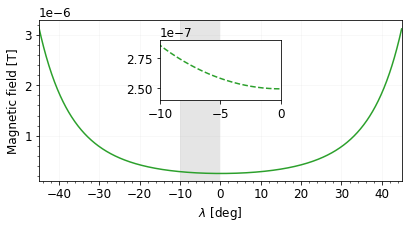

In [5]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
inch_to_mm=0.0393700787
import matplotlib.ticker as tck
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),Bmag,color='tab:green')
# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Magnetic field [T]') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([-15, 1.7*10**(-6), 30, 1.2*10**(-6)],transform=ax.transData)
axins.plot(np.rad2deg(lats_rad),Bmag,color='tab:green',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(2.4*10**(-7), 2.9*10**(-7))
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# mark_inset(ax, axins, loc1=3, loc2=4, fc="gray",alpha=.4, ec="0.1")
plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_magnetic.jpg',dpi=300)
plt.show()

### Densities plot

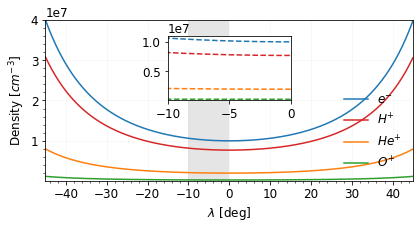

In [6]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),ne,color='tab:blue',label='$e^{-}$')
ax.plot(np.rad2deg(lats_rad),nH,color='tab:red',label='$H^{+}$')
ax.plot(np.rad2deg(lats_rad),nHe,color='tab:orange',label='$He^{+}$')
ax.plot(np.rad2deg(lats_rad),nO,color='tab:green',label='$O^{+}$')

# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(0.01*10**(7), 4*10**(7))
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Density $[cm^{-3}]$') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.legend(frameon=False,loc=4)
scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([-15, 2*10**7, 30, 1.6*10**7],transform=ax.transData)

axins.plot(np.rad2deg(lats_rad),ne,color='tab:blue',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),nH,color='tab:red',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),nHe,color='tab:orange',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),nO,color='tab:green',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(0.01*10**(7), 1.1*10**(7))
# plt.xticks(visible=False)
# plt.yticks(visible=False)
plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)

# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_densities.jpg',dpi=300)
plt.show()

### Frequencies plot

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/tourgaidis/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


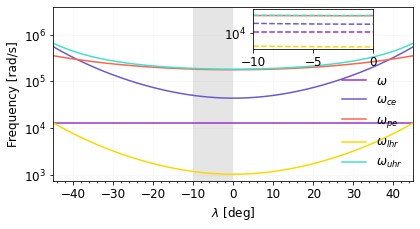

In [7]:
w_wave_array= np.full((np.shape(lats_rad)), w_wave)

fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),w_wave_array,color='darkorchid',label='$\omega$')
ax.plot(np.rad2deg(lats_rad),wce,color='slateblue',label='$\omega_{ce}$')
ax.plot(np.rad2deg(lats_rad),wpe,color='tomato',label='$\omega_{pe}$')
ax.plot(np.rad2deg(lats_rad),wlhr,color='gold',label='$\omega_{lhr}$')
ax.plot(np.rad2deg(lats_rad),wuhr,color='turquoise',label='$\omega_{uhr}$')

ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(0, 4*10**(6))
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Frequency [rad/s]') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
ax.legend(frameon=False,loc=4)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.legend(frameon=False,loc=4)
scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([5, 5*10**5, 30, 30*10**5],transform=ax.transData)

axins.set_yscale('log')
axins.plot(np.rad2deg(lats_rad),w_wave_array,color='darkorchid',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),wce,color='slateblue',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),wpe,color='tomato')
axins.plot(np.rad2deg(lats_rad),wlhr,color='gold',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),wuhr,color='turquoise',linestyle='dashed')
plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
axins.set_xlim(-10, 0)
axins.set_ylim(0, 5*10**(5))
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_freqs.jpg',dpi=300)
plt.show()

### Gradient of the cyclotron frequency plot

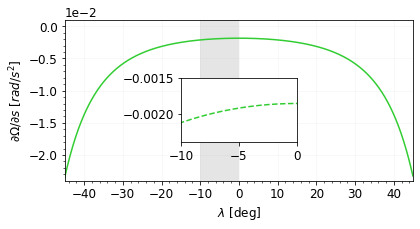

In [8]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),dwceds,color='limegreen')
# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim((-2.4*10**(-2), 0.1*10**(-2)))
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('$\partial\Omega / \partial s$ [$rad/s^2$]') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([-15, -18*10**(-3), 30, 0.01],transform=ax.transData)
axins.plot(np.rad2deg(lats_rad),dwceds,color='limegreen',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(-2.4*10**(-3), -0.0015)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_dwcds.jpg',dpi=300)
plt.show()

### Calculate pitch angle limits

In [8]:
L_shell=5
lamdas=np.arange(-90,90,0.08)
lamdas_rad=np.deg2rad(lamdas)
aeqs=np.arange(0,180,0.08)
aeqs_rad=np.deg2rad(aeqs)
Beq0=env.Bmag_dipole(5,0)
alphas=np.zeros((len(lamdas_rad),len(aeqs)))

envelope=[]
envelope2=[]
for k in range(0,len(aeqs_rad)):
        
    for i in range(0,len(lamdas_rad)):
    
        Blam0=env.Bmag_dipole(5,lamdas_rad[i])
        salpha0=np.sin(aeqs_rad[k])*np.sqrt(Blam0/Beq0)
        alpha0=np.arcsin(salpha0)
        alphas[i,k]=alpha0

        if np.isnan(alpha0) != True:
        
            print(np.rad2deg(alpha0),np.rad2deg(aeqs_rad[k]),np.rad2deg(lamdas_rad[i]))
            envelope.append(np.rad2deg(lamdas_rad[i]))
            break
            
# envelope2=-envelope
#         print(np.rad2deg(aeqs_rad[k]),np.rad2deg(lamdas_rad[i]),np.rad2deg(alpha0))

for i in range(0,len(envelope)):
        envelope2.append(-envelope[i])
        
#             print(np.rad2deg(aeqs_rad[k]))
#             continue

0.0 0.0 -90.0
89.77810688071897 0.08 -82.80000000000015
80.766775091774 0.16 -80.8800000000002
78.01674109973926 0.24 -79.52000000000022
79.77219087650879 0.32 -78.48000000000025
81.25102449851309 0.4 -77.60000000000026
80.10356403336141 0.48 -76.80000000000028
87.15775727775095 0.56 -76.1600000000003
86.7707902366143 0.64 -75.52000000000031
81.23353797447938 0.72 -74.88000000000034
80.48587069156198 0.8 -74.32000000000033
82.97066757754634 0.88 -73.84000000000034
83.30336768442963 0.96 -73.36000000000035
81.68236484980191 1.04 -72.88000000000036
84.6072095267233 1.12 -72.48000000000037
86.54594941652323 1.2 -72.0800000000004
86.26235843968281 1.28 -71.68000000000039
84.33652808684117 1.36 -71.2800000000004
82.0231034891508 1.44 -70.88000000000041
84.70359158452938 1.52 -70.56000000000041
87.74318117481901 1.6 -70.24000000000042
81.6763199788914 1.6800000000000002 -69.84000000000043
81.8779971929423 1.76 -69.52000000000044
81.56002323595985 1.84 -69.20000000000044
86.56531879251597 1.9

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arcsin


84.12567524452764 10.64 -51.52000000000082
85.22045096633639 10.72 -51.44000000000082
86.6173474633519 10.8 -51.360000000000824
89.45379902258475 10.88 -51.280000000000825
84.90900794732188 10.96 -51.12000000000083
86.09811998428978 11.040000000000003 -51.04000000000083
87.81454533158185 11.120000000000001 -50.96000000000083
84.45987421336196 11.200000000000001 -50.800000000000836
85.45369688356365 11.28 -50.72000000000084
86.7018354424593 11.36 -50.64000000000084
88.85263049023433 11.44 -50.56000000000084
84.74044998604543 11.52 -50.400000000000844
85.69958688024198 11.6 -50.320000000000846
86.91086860118239 11.68 -50.24000000000085
89.1016279849599 11.76 -50.16000000000085
84.75402117955153 11.84 -50.00000000000085
85.62426964921258 11.92 -49.920000000000854
86.686596169178 12.000000000000002 -49.840000000000856
88.26446534175864 12.08 -49.760000000000865
84.51960436642773 12.16 -49.60000000000087
85.26681116203628 12.24 -49.52000000000086
86.13170519346315 12.32 -49.44000000000087
8

88.86561245088615 25.12 -36.96000000000113
87.632816141707 25.2 -36.88000000000113
86.84841003635223 25.28 -36.800000000001134
86.2219860517985 25.36 -36.720000000001136
85.68423262673122 25.44 -36.64000000000114
85.20525525921002 25.52 -36.56000000000114
88.03844988393281 25.6 -36.56000000000114
87.11913297690015 25.68 -36.48000000000114
86.4277011317888 25.76 -36.40000000000114
85.84871730351676 25.84 -36.320000000001144
85.34010937431054 25.92 -36.240000000001146
88.29443162516648 26.0 -36.240000000001146
87.26598104224846 26.080000000000002 -36.16000000000115
86.52878311946856 26.16 -36.08000000000115
85.92174829519033 26.240000000000002 -36.00000000000115
85.39316307732842 26.32 -35.92000000000115
88.34302037420638 26.400000000000002 -35.92000000000115
87.27649555522181 26.48 -35.840000000001154
86.52200864054302 26.560000000000002 -35.76000000000116
85.90339750706879 26.64 -35.68000000000116
85.36595296626625 26.72 -35.60000000000117
88.1785918123653 26.8 -35.60000000000117
87.15

86.08587104666461 40.4 -25.92000000000137
87.86109306440393 40.480000000000004 -25.92000000000137
86.74073059263226 40.56 -25.840000000001368
85.91961517895736 40.64 -25.76000000000137
87.55127052545032 40.72 -25.76000000000137
86.53037838041377 40.800000000000004 -25.68000000000137
88.79997528581778 40.88 -25.68000000000137
87.26194405712104 40.96 -25.600000000001373
86.32138797737127 41.04 -25.520000000001374
88.2607716102268 41.12 -25.520000000001374
86.98761724089584 41.2 -25.440000000001376
86.11385912037923 41.28 -25.360000000001378
87.83552265646419 41.36 -25.360000000001378
86.72489450727365 41.44 -25.28000000000138
89.39743462824211 41.52 -25.28000000000138
87.46666922875181 41.6 -25.20000000000138
86.4715263464077 41.68 -25.120000000001383
88.524937871916 41.76 -25.120000000001383
87.13278458616267 41.84 -25.040000000001385
86.22594461496607 41.92 -24.960000000001386
87.98572210855139 42.0 -24.960000000001386
86.8231971434974 42.08 -24.880000000001388
85.98701271446996 42.160

87.38117957055589 55.68000000000001 -16.960000000001557
89.21785406590364 55.76 -16.960000000001557
87.59185023027801 55.84 -16.88000000000156
86.69037724844262 55.92 -16.80000000000156
87.81693110184614 56.0 -16.80000000000156
86.85214453376072 56.08 -16.720000000001562
88.06151560247694 56.160000000000004 -16.720000000001562
87.01847045313133 56.24 -16.640000000001564
88.33426563135575 56.32 -16.640000000001564
87.19021940864239 56.4 -16.560000000001565
88.65228736778661 56.480000000000004 -16.560000000001565
87.36851132709255 56.56000000000001 -16.480000000001567
89.06064349285258 56.64 -16.480000000001567
87.55483938953594 56.72 -16.40000000000157
86.67709541756523 56.800000000000004 -16.32000000000157
87.75126763698275 56.88 -16.32000000000157
86.82078452763834 56.96 -16.240000000001572
87.96078642249697 57.04 -16.240000000001572
86.96741908262756 57.120000000000005 -16.160000000001574
88.18801336749578 57.2 -16.160000000001574
87.11750025116113 57.28 -16.080000000001576
88.440766

88.46478752170484 69.60000000000001 -9.76000000000171
87.59742608243641 69.68 -9.680000000001712
88.4552329942858 69.76 -9.680000000001712
87.59638544844081 69.84 -9.600000000001714
88.44424721012757 69.92 -9.600000000001714
87.59440602417015 70.0 -9.520000000001716
88.43191569619526 70.08 -9.520000000001716
87.59152605361064 70.16 -9.440000000001717
88.41832446808517 70.24 -9.440000000001717
87.58778435428587 70.32000000000001 -9.360000000001719
88.40355930973013 70.4 -9.360000000001719
87.58322017257215 70.48 -9.28000000000172
88.38770513598897 70.56 -9.28000000000172
87.57787304416766 70.64000000000001 -9.200000000001722
88.37084544233856 70.72 -9.200000000001722
87.57178266087404 70.8 -9.120000000001724
88.35306184214224 70.88 -9.120000000001724
87.56498874466634 70.96000000000001 -9.040000000001726
88.33443368895936 71.04 -9.040000000001726
87.55753092980557 71.12 -8.960000000001727
88.31503777902279 71.2 -8.960000000001727
87.54944865359394 71.28 -8.88000000000173
88.294948127440

89.13902174444517 85.84 -1.9200000000018775
89.7154433520275 85.92 -1.9200000000018775
89.11364992906304 86.0 -1.8400000000018795
89.61136686603321 86.08 -1.8400000000018795
89.09226817297194 86.16 -1.760000000001881
89.53619394512687 86.24 -1.760000000001881
89.07461853678342 86.32000000000001 -1.6800000000018827
89.47733433257041 86.4 -1.6800000000018827
89.06050828761991 86.48 -1.6000000000018844
89.42974297401113 86.56000000000002 -1.6000000000018844
89.0497964019933 86.64 -1.520000000001886
89.39079899260042 86.72 -1.520000000001886
89.04238460916969 86.8 -1.4400000000018878
89.35894773202511 86.88000000000001 -1.4400000000018878
89.03821156603847 86.96000000000001 -1.3600000000018895
89.33319328746127 87.04 -1.3600000000018895
89.03724934033522 87.12 -1.2800000000018912
89.31286933332647 87.2 -1.2800000000018912
89.82616713531212 87.28 -1.2800000000018912
89.29752246395991 87.36 -1.2000000000018929
89.72214949641317 87.44 -1.2000000000018929
89.28684808914412 87.52 -1.12000000000

88.1977741421781 101.12 -5.200000000001808
88.85340030631625 101.2 -5.280000000001806
88.22909331564156 101.28 -5.280000000001806
88.91687452370472 101.36 -5.360000000001804
88.26183304327124 101.44 -5.360000000001804
88.98574147471001 101.52 -5.4400000000018025
88.29604603552305 101.60000000000002 -5.4400000000018025
89.06113373407287 101.68 -5.520000000001801
88.33179272288605 101.76 -5.520000000001801
89.14471581221781 101.84 -5.600000000001799
88.36914262469278 101.92 -5.600000000001799
89.23911434065582 102.0 -5.680000000001797
88.40817605709984 102.08 -5.680000000001797
89.34893765089308 102.16 -5.760000000001796
88.44898628736847 102.24000000000001 -5.760000000001796
89.4838386948779 102.32000000000001 -5.840000000001794
88.49168228404073 102.4 -5.840000000001794
89.67338836417873 102.48000000000002 -5.920000000001792
88.53639227574067 102.56 -5.920000000001792
87.95289743841104 102.64 -5.920000000001792
88.58326842747807 102.72 -6.000000000001791
87.97947467223642 102.800000000

87.61281243409236 116.00000000000001 -12.56000000000165
88.7874883530034 116.08000000000001 -12.640000000001649
87.55797554096826 116.16 -12.640000000001649
88.69027508799388 116.24000000000002 -12.720000000001649
87.50193180115485 116.32000000000002 -12.720000000001649
88.59544902476866 116.4 -12.800000000001646
87.44471612725022 116.48 -12.800000000001646
88.5024803713121 116.56 -12.880000000001644
87.38636169771515 116.64 -12.880000000001644
88.41097077381309 116.71999999999998 -12.960000000001642
87.32689999779416 116.80000000000001 -12.960000000001642
88.32061284381878 116.88000000000001 -13.04000000000164
87.2663608696329 116.96000000000001 -13.04000000000164
88.23116427853878 117.03999999999999 -13.120000000001639
87.2047725691636 117.12000000000002 -13.120000000001639
88.14243064246394 117.20000000000002 -13.200000000001637
87.14216182773426 117.28 -13.200000000001637
88.05425352748641 117.36 -13.280000000001635
87.07855391678814 117.44 -13.280000000001635
87.96650218144576 117

87.55422823949864 129.6 -19.920000000001494
89.43354388014053 129.68 -20.000000000001492
87.18327339125744 129.76 -20.000000000001492
88.49349349139844 129.84 -20.08000000000149
86.84968912569344 129.92000000000002 -20.08000000000149
87.93678464079044 130.0 -20.16000000000149
86.54258336168274 130.08 -20.16000000000149
87.49337629204953 130.16 -20.240000000001487
89.23616320959994 130.24 -20.32000000000149
87.1105568427692 130.32 -20.32000000000149
88.37317095092914 130.4 -20.400000000001487
86.76666981114124 130.48 -20.400000000001487
87.82060238371399 130.56 -20.480000000001482
86.45032383257504 130.64000000000001 -20.480000000001482
87.37445938238425 130.72 -20.56000000000148
88.92390669121582 130.8 -20.64000000000148
86.98701846655491 130.88 -20.64000000000148
88.17219632899447 130.96 -20.720000000001477
86.63786141639271 131.04 -20.720000000001477
87.64090309034418 131.12 -20.800000000001475
86.31602926810926 131.2 -20.800000000001475
87.2014616256191 131.28 -20.880000000001473
88

86.54028878553889 144.88 -29.44000000000129
87.53640827996828 144.96 -29.520000000001286
89.60640216782912 145.04 -29.600000000001288
86.35620408829588 145.12 -29.600000000001288
87.28045302442642 145.20000000000002 -29.680000000001282
88.77485851787877 145.28 -29.760000000001284
86.16082985604824 145.36 -29.760000000001284
87.02036444728172 145.44 -29.84000000000128
88.26679990504846 145.52 -29.92000000000128
85.955330451542 145.6 -29.92000000000128
86.75654493585617 145.68000000000004 -30.000000000001275
87.83948663906077 145.76 -30.080000000001277
85.740715251015 145.84 -30.080000000001277
86.48927850477257 145.92000000000002 -30.16000000000128
87.45119316151091 146.0 -30.240000000001274
89.19045801931267 146.08 -30.320000000001276
86.21876910761257 146.16 -30.320000000001276
87.08558921620902 146.24 -30.40000000000127
88.36354004920919 146.32000000000002 -30.480000000001272
85.9451650867816 146.4 -30.480000000001272
86.73441756706339 146.48 -30.560000000001267
87.7920720549665 146.

86.61205414177039 159.28000000000003 -40.72000000000105
86.98715746547404 159.36 -40.80000000000105
87.40850558966342 159.44 -40.88000000000105
87.90364802425168 159.52 -40.960000000001045
88.5458960362864 159.6 -41.040000000001044
84.82494909609413 159.68 -41.040000000001044
85.03472972991862 159.76 -41.12000000000104
85.24925070242006 159.84 -41.20000000000105
85.46910963930705 159.92000000000002 -41.28000000000104
85.69504369027068 160.0 -41.360000000001044
85.92797763570593 160.08 -41.440000000001035
86.16909520596815 160.16000000000003 -41.52000000000103
86.4199488329748 160.24 -41.60000000000103
86.68263640966944 160.32 -41.68000000000103
86.9601026221387 160.4 -41.76000000000103
87.25669167015906 160.48 -41.84000000000103
87.57926579719525 160.56 -41.920000000001025
87.93980930264308 160.64000000000001 -42.00000000000102
88.36298605172628 160.72 -42.08000000000102
88.91970823270681 160.8 -42.16000000000102
84.75472712469951 160.88 -42.16000000000102
84.88379159754139 160.96 -42.

87.30886509723788 175.36 -61.44000000000061
85.9614772820834 175.44 -61.600000000000605
84.82974709447596 175.52 -61.7600000000006
83.78961150504607 175.6 -61.9200000000006
82.7968049780157 175.68 -62.08000000000059
86.4027734822835 175.76 -62.32000000000059
84.59939393918619 175.84 -62.480000000000594
83.13767993704374 175.92000000000002 -62.64000000000058
86.5716124237801 176.0 -62.88000000000058
84.2487624922099 176.08 -63.04000000000057
89.41108744526608 176.16 -63.28000000000057
84.95565757248883 176.24 -63.44000000000057
82.74072700316927 176.32 -63.60000000000056
84.99685873034053 176.4 -63.84000000000056
82.46968522464915 176.48 -64.00000000000055
84.27482467833572 176.56 -64.24000000000055
86.75031692865805 176.64000000000004 -64.48000000000054
82.9464570666818 176.72 -64.64000000000054
84.32979527681694 176.8 -64.88000000000054
85.90723018779877 176.88 -65.12000000000053
88.06609395257294 176.96 -65.36000000000053
82.57226417291582 177.04 -65.52000000000052
83.05175387924821 

### Environment_mod results plot

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:99: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:150: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/tourgaidis/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


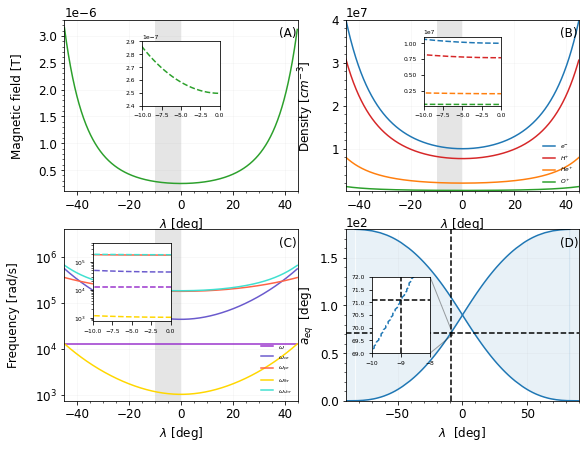

In [9]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
###################################################################
fig, ax = plt.subplots(2,2,figsize=(8,6))
# fig.suptitle('Environment_mod parameters')
plt.tight_layout()
############
ax[0,0].plot(np.rad2deg(lats_rad),Bmag,color='tab:green')
# ax.set_yscale('log')
ax[0,0].grid(alpha=.1)
ax[0,0].set_xlim(-45,45)
ax[0,0].set_xlabel(r'$\lambda$ [deg]')
ax[0,0].set_ylabel('Magnetic field [T]',labelpad=15)
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,0].xaxis.set_minor_locator(tck.AutoMinorLocator())

scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins1 = ax[0,0].inset_axes([-15, 1.7*10**(-6), 30, 1.2*10**(-6)],transform=ax[0,0].transData)
axins1.plot(np.rad2deg(lats_rad),Bmag,color='tab:green',linestyle='dashed')
axins1.tick_params(axis='both', which='major', labelsize=6)
axins1.set_xlim(-10, 0)
axins1.set_ylim(2.4*10**(-7), 2.9*10**(-7))
# plt.xticks(visible=False)
axins1.yaxis.get_offset_text().set_fontsize(6)
# plt.yticks(visible=False)
# mark_inset(ax[0,0], axins1, loc1=3, loc2=4, fc="gray",alpha=.3, ec="0.1")
ax[0,0].axvspan(-10, 0, facecolor='gray', alpha=0.2)

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].plot(np.rad2deg(lats_rad),ne,color='tab:blue',label='$e^{-}$')
ax[0,1].plot(np.rad2deg(lats_rad),nH,color='tab:red',label='$H^{+}$')
ax[0,1].plot(np.rad2deg(lats_rad),nHe,color='tab:orange',label='$He^{+}$')
ax[0,1].plot(np.rad2deg(lats_rad),nO,color='tab:green',label='$O^{+}$')

# ax.set_yscale('log')
ax[0,1].grid(alpha=.1)
ax[0,1].set_xlim(-45,45)
ax[0,1].set_ylim(0.01*10**(7), 4*10**(7))
ax[0,1].set_xlabel(r'$\lambda$ [deg]')
ax[0,1].set_ylabel('Density $[cm^{-3}]$',labelpad=15)
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,1].xaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,1].legend(frameon=False,loc=4, prop={'size': 6})
scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins2 = ax[0,1].inset_axes([-15, 2*10**7, 30, 1.6*10**7],transform=ax[0,1].transData)

axins2.plot(np.rad2deg(lats_rad),ne,color='tab:blue',linestyle='dashed')
axins2.plot(np.rad2deg(lats_rad),nH,color='tab:red',linestyle='dashed')
axins2.plot(np.rad2deg(lats_rad),nHe,color='tab:orange',linestyle='dashed')
axins2.plot(np.rad2deg(lats_rad),nO,color='tab:green',linestyle='dashed')
axins2.tick_params(axis='both', which='major', labelsize=6)
axins2.set_xlim(-10, 0)
axins2.set_ylim(0.01*10**(7), 1.1*10**(7))
axins2.yaxis.get_offset_text().set_fontsize(6)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax[0,1].axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ###################


ax[1,0].plot(np.rad2deg(lats_rad),w_wave_array,color='darkorchid',label='$\omega$')
ax[1,0].plot(np.rad2deg(lats_rad),wce,color='slateblue',label='$\omega_{ce}$')
ax[1,0].plot(np.rad2deg(lats_rad),wpe,color='tomato',label='$\omega_{pe}$')
ax[1,0].plot(np.rad2deg(lats_rad),wlhr,color='gold',label='$\omega_{lhr}$')
ax[1,0].plot(np.rad2deg(lats_rad),wuhr,color='turquoise',label='$\omega_{uhr}$')

ax[1,0].set_yscale('log')
ax[1,0].grid(alpha=.1)
ax[1,0].set_xlim(-45,45)
ax[1,0].set_ylim(0, 4*10**(6))
ax[1,0].set_xlabel(r'$\lambda$ [deg]')
ax[1,0].set_ylabel('Frequency [rad/s]',labelpad=15) 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
ax[1,0].legend(frameon=False,loc=4, prop={'size': 6})
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,0].xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.legend(frameon=False,loc=4)
scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins3 = ax[1,0].inset_axes([-34, 4*10**4, 30, 20*10**5],transform=ax[1,0].transData)
axins3.yaxis.get_offset_text().set_fontsize(6)
axins3.set_yscale('log')
axins3.plot(np.rad2deg(lats_rad),w_wave_array,color='darkorchid',linestyle='dashed')
axins3.plot(np.rad2deg(lats_rad),wce,color='slateblue',linestyle='dashed')
axins3.plot(np.rad2deg(lats_rad),wpe,color='tomato')
axins3.plot(np.rad2deg(lats_rad),wlhr,color='gold',linestyle='dashed')
axins3.plot(np.rad2deg(lats_rad),wuhr,color='turquoise',linestyle='dashed')
axins3.tick_params(axis='both', which='major', labelsize=6)
axins3.set_xlim(-10, 0)
axins3.set_ylim(0, 5*10**(5))
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax[1,0].axvspan(-10, 0, facecolor='gray', alpha=0.2)



# ##########################################
ax[1,1].plot(envelope,np.rad2deg(aeqs_rad),color="tab:blue")
ax[1,1].plot(envelope2,np.rad2deg(aeqs_rad),color="tab:blue")
ax[1,1].axvline(-9,color='black',linestyle='dashed')
ax[1,1].axhline(71,color='black',linestyle='dashed')
# ax.set_yscale('log')
ax[1,1].grid(alpha=.1)
ax[1,1].set_xlim(-90,90)
ax[1,1].set_ylim(0,180)
ax[1,1].set_xlabel("$\lambda$  [deg]")
ax[1,1].set_ylabel("$a_{eq}$  [deg]")
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,1].xaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,1].fill_between(envelope, np.rad2deg(aeqs_rad),color='tab:blue',alpha=0.1, linewidth=0.0)
ax[1,1].fill_between(envelope2, np.rad2deg(aeqs_rad),color='tab:blue',alpha=0.1, linewidth=0.0)
ax[1,1].axvspan(-90,-82.6,color='tab:blue',alpha=0.1, linewidth=0.0)
ax[1,1].axvspan(82.6,90,color='tab:blue',alpha=0.1, linewidth=0.0)
scale=10
# # axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax[1,1].inset_axes([-70, 50, 45, 80],transform=ax[1,1].transData)
axins.plot(envelope,np.rad2deg(aeqs_rad),color="tab:blue",linestyle='dashed')
# axins.plot(envelope2,np.rad2deg(aeqs_rad),color="tab:blue")
axins.axvline(-9,color='black',linestyle='dashed')
axins.axhline(71.1,color='black',linestyle='dashed')

axins.set_xlim(-10, -8)
axins.set_ylim(69, 72)
axins.tick_params(axis='both', which='major', labelsize=6)
# plt.xticks(visible=False)
mark_inset(ax[1,1], axins, loc1=4, loc2=1, fc="gray",alpha=.4, ec="0.1")
# plt.yticks(visible=False)


# for ax in ax.flat:
#     ax.label_outer()

ax[0,0].text(0.92, 0.9, '(A)', transform=ax[0,0].transAxes)
ax[0,1].text(0.92, 0.9, '(B)', transform=ax[0,1].transAxes)
ax[1,0].text(0.92, 0.9, '(C)', transform=ax[1,0].transAxes)
ax[1,1].text(0.92, 0.9, '(D)', transform=ax[1,1].transAxes)

plt.savefig('env_multi.jpg',dpi=300, bbox_inches="tight")
plt.show()

### Calculate wave parameters

In [10]:
#define latitudinal range
lat=np.deg2rad(0)
#define L shell
L_shell=5
#calculate magnetic field strength
Bmag2=env.Bmag_dipole(L_shell,lat)

#define magnetospheric parameters
Kpmax=1
day=0
mlt=2
Rsun=90

#define wave normal angle
theta=np.deg2rad(88)

ne_eq=env.density_FL_denton(ne_0,lat)
# print(ne_eq/10**7)

#Ion composition assuming 84%H+, 5.4%He+, 0.6%O+
nH_eq=0.77*ne_eq
nHe_eq=0.2*ne_eq
nO_eq=0.03*ne_eq

#calculate cyclotron frequencies
wce_=env.omega_cyclotron(Bmag2,env.const.qe,env.const.me)
wcH=env.omega_cyclotron(Bmag2,env.const.qi,env.const.mH)
wcHe=env.omega_cyclotron(Bmag2,env.const.qi,env.const.mHe)
wcO=env.omega_cyclotron(Bmag2,env.const.qi,env.const.mO)

#calculate plasma frequencies
wpe=env.omega_plasma(ne_eq,env.const.qe,env.const.me)
wpH=env.omega_plasma(nH_eq,env.const.qi,env.const.mH)
wpHe=env.omega_plasma(nHe_eq,env.const.qe,env.const.mHe)
wpO=env.omega_plasma(nO_eq,env.const.qi,env.const.mO)

#calculate lower hybrid resonance frequency
wlhr=env.omega_lhr(wce_,wpe,wcH,wpH)

#define wave frequency
f_wave=2000
w_wave=2*np.pi*f_wave

#calculate Stix parameters
S_tmp,D_tmp,P_tmp,R_tmp,L_tmp=wave.stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, Bmag2)

#calculate refractive index and wave number
mu_sq_plus_tmp,mu_sq_minus_tmp,ref_indtmp,kappatmp,kappa_partmp,kappa_pertmp=wave.refr_index_full(theta,w_wave,S_tmp,P_tmp,R_tmp,L_tmp)

#calculate the elements of the cold dielectric tensor
K_11,K_12,K_13,K_21,K_22,K_23,K_31,K_32,K_33=wave.cold_dielectric_tensor(w_wave,wce_,wpe,wcH,wpH,wcHe,wpHe,wcO,wpO)

#calculate the elements of the warm dielectric tensor
Ke,KH,KHe,KO=wave.warm_dielectric_tensor(w_wave,wce_,wpe,wcH,wpH,wcHe,wpHe,wcO,wpO,theta)

#define warm electron and ion temperatures
Te=1
Ti=1

#calcualte warm refractive index and wave number
ref_ind_warm,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,theta,Te,Ti,K_11,K_22,K_33,K_12,w_wave)

#calculate warm Stix parameters
S_warm,D_warm,P_warm,R_warm,L_warm=wave.stix_parameters_warm(S_tmp,D_tmp,P_tmp,Te,Ti,ref_ind_warm,Ke,KH,KHe,KO)

#calculate wave resonance cone angle
theta_res=wave.res_angle(P_tmp,S_tmp)-0.00001

#calculate refractive index and wave number
mu_sq_plus_res,mu_sq_minus_res,ref_indres,kappares,kappa_parres,kappa_perres=wave.refr_index_full(theta_res,w_wave,S_tmp,P_tmp,R_tmp,L_tmp)


#refractive index surface
thetas=np.arange(0,360,0.1)
thetas_rad=np.deg2rad(thetas)

mupar_cold=[]
muper_cold=[]
mupar_warm_e1_i0=[]
muper_warm_e1_i0=[]
mupar_warm_e0_i1=[]
muper_warm_e0_i1=[]
mupar_warm_e1_i1=[]
muper_warm_e1_i1=[]
mupar_warm_e4_i4=[]
muper_warm_e4_i4=[]
for i in range(0,len(thetas_rad)):
    
    mu_sq_plus_tmp,mu_sq_minus_tmp,ref_cold,kappatmp,kappa_partmp,kappa_pertmp=wave.refr_index_full(thetas_rad[i],w_wave,S_tmp,P_tmp,R_tmp,L_tmp)
    Ke,KH,KHe,KO=wave.warm_dielectric_tensor(w_wave,wce_,wpe,wcH,wpH,wcHe,wpHe,wcO,wpO,thetas_rad[i])
    ref_ind_warm10,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],1,0,K_11,K_22,K_33,K_12,w_wave)
    ref_ind_warm01,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],0,1,K_11,K_22,K_33,K_12,w_wave)
    ref_ind_warm11,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],1,1,K_11,K_22,K_33,K_12,w_wave)
    ref_ind_warm44,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],4,4,K_11,K_22,K_33,K_12,w_wave)
    
    
    ref_par_cold_tmp=ref_cold*np.cos(thetas_rad[i])
    ref_per_cold_tmp=ref_cold*np.sin(thetas_rad[i])
    ref_par_warm_tmp10=ref_ind_warm10*np.cos(thetas_rad[i])
    ref_per_warm_tmp10=ref_ind_warm10*np.sin(thetas_rad[i])
    ref_par_warm_tmp01=ref_ind_warm01*np.cos(thetas_rad[i])
    ref_per_warm_tmp01=ref_ind_warm01*np.sin(thetas_rad[i])
    ref_par_warm_tmp11=ref_ind_warm11*np.cos(thetas_rad[i])
    ref_per_warm_tmp11=ref_ind_warm11*np.sin(thetas_rad[i])
    ref_par_warm_tmp44=ref_ind_warm44*np.cos(thetas_rad[i])
    ref_per_warm_tmp44=ref_ind_warm44*np.sin(thetas_rad[i])
    
    mupar_cold.append(ref_par_cold_tmp)
    muper_cold.append(ref_per_cold_tmp)
    mupar_warm_e1_i0.append(ref_par_warm_tmp10)
    muper_warm_e1_i0.append(ref_per_warm_tmp10)
    mupar_warm_e0_i1.append(ref_par_warm_tmp01)
    muper_warm_e0_i1.append(ref_per_warm_tmp01)
    mupar_warm_e1_i1.append(ref_par_warm_tmp11)
    muper_warm_e1_i1.append(ref_per_warm_tmp11)
    mupar_warm_e4_i4.append(ref_par_warm_tmp44)
    muper_warm_e4_i4.append(ref_per_warm_tmp44)

/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT_Review/WPIT/WPIT/WaveProperties_mod/refr_index_full.py:63: RuntimeWarning: invalid value encountered in sqrt
  ref_ind=np.sqrt(refsq)


### Plot refractive index surface

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


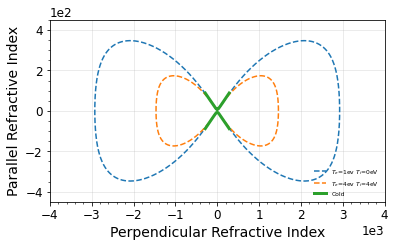

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
###########################################################
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5
# ax.set_title('Refractive index surface, f=2kHz, L=5,')
ax.set_xlabel("Perpendicular Refractive Index",fontsize=14)
ax.set_ylabel("Parallel Refractive Index",fontsize=14)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.plot(muper_warm_e1_i0,mupar_warm_e1_i0,label=r'$T_e$=1ev $T_i$=0eV',linestyle='--')
# ax.plot(muper_warm_e0_i1,mupar_warm_e0_i1,label=r'$T_e$=0ev $T_i$=1eV',linestyle='--')
# ax.plot(muper_warm_e1_i1,mupar_warm_e1_i1,label=r'$T_e$=1ev $T_i$=1eV',linestyle='--')
ax.plot(muper_warm_e4_i4,mupar_warm_e4_i4,label=r'$T_e$=4ev $T_i$=4eV',linestyle='--')
ax.plot(muper_cold,mupar_cold,color="tab:green",label='Cold',linewidth=3)

ax.legend(frameon=False,loc=4, prop={'size': 6})
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.set_xlim(-4000,4000)
ax.set_ylim(-450,450)
ax.grid(alpha=.3)
scale=10

plt.savefig('wave_refr.jpg',dpi=300, bbox_inches="tight")
plt.show()

### Calculate wave parameters

In [14]:
#allcocations
S=[]
D=[]
P=[]
R=[]
L=[]

mu=[]
Ewmag=[]
Bwmag=[]
Bx=[]
By=[]
Bz=[]
Ex=[]
Ey=[]
Ez=[]
theta_res0=[]

#wave magnetic field amplitude
Byw0_packet2=100*10**(-12)

#wace packet parameters
shape=7
direction='south'
location=0


    
for i in range(0,len(Bmag)):
    
    #calculate Stix parameters
    S0,D0,P0,R0,L0=wave.stix_parameters(w_wave, ne[i], nH[i], nHe[i], nO[i], Bmag[i])
    #calculate refractive index and wavenumber
    eta_sq_plus0,eta_sq_minus0,mu0,kappa0,kappaz0,kappax0=wave.refr_index_full(theta0,w_wave,S0,P0,R0,L0)
    #calculate By wave amplitude
    Bytmp=wave.wave_packet_one_sided(Byw0_packet2,lats_rad[i],shape,location,direction)
    #calculate wave field components
    Bxw0, Byw0, Bzw0, Exw0, Eyw0, Ezw0=wave.wave_amplitudes_bell(mu0,P0,D0,S0,Bytmp,theta0)
    
    #caclulate resonance cone angle
    theta_res0.append(np.rad2deg(wave.res_angle(P0,S0)))
    
    Bwmag.append(np.sqrt(Bxw0*Bxw0+Bzw0*Bzw0+Byw0*Byw0))
    Ewmag.append(np.sqrt(Exw0*Exw0+Ezw0*Ezw0+Eyw0*Eyw0))
    
    #outputs
    S.append(S0)
    D.append(D0)
    P.append(np.abs(P0))
    R.append(R0)
    L.append(np.abs(L0))
    
    Bx.append(Bxw0)
    By.append(Byw0)
    Bz.append(Bzw0)
    Ex.append(Exw0)
    Ey.append(Eyw0)
    Ez.append(Ezw0)

    mu.append(mu0)

### Plot resoance cone angle

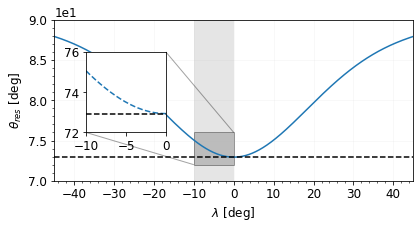

72.93846657358998


In [15]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),theta_res0,color='tab:blue',label='$S$')


# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(70, 90)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel(r'$\theta_{res}$ [deg]') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.legend(frameon=False,loc=4)
scale=10
axins = ax.inset_axes([-37, 76, 20,10],transform=ax.transData)

axins.plot(np.rad2deg(lats_rad),theta_res0,color='tab:blue',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(72,76)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax.axhline(np.min(theta_res0),color='black',linestyle='dashed')
axins.axhline(np.min(theta_res0),color='black',linestyle='dashed')
ax.axvspan(-10, 0, facecolor='gray', alpha=0.2)
mark_inset(ax, axins, loc1=3, loc2=1, fc="gray",alpha=.4, ec="0.1")
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('theta_res.jpg',dpi=300)
plt.show()
print(np.min(theta_res0))

### Plot Stix parameters

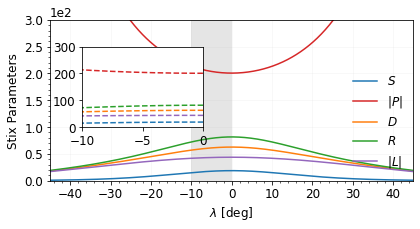

In [16]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),S,color='tab:blue',label='$S$')
ax.plot(np.rad2deg(lats_rad),P,color='tab:red',label='$|P|$')
ax.plot(np.rad2deg(lats_rad),D,color='tab:orange',label='$D$')
ax.plot(np.rad2deg(lats_rad),R,color='tab:green',label='$R$')
ax.plot(np.rad2deg(lats_rad),L,color='tab:purple',label='$|L|$')

# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(0, 300)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Stix Parameters') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.legend(frameon=False,loc=4)
scale=10
axins = ax.inset_axes([-37, 100, 30, 150],transform=ax.transData)

axins.plot(np.rad2deg(lats_rad),S,color='tab:blue',label='$S$',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),P,color='tab:red',label='$|P|$',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),D,color='tab:orange',label='$D$',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),R,color='tab:green',label='$R$',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),L,color='tab:purple',label='$|L|$',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(0,300)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax.axvspan(-10, 0, facecolor='gray', alpha=0.2)

# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('wave_stix.jpg',dpi=300)
plt.show()

### Plot refractive index

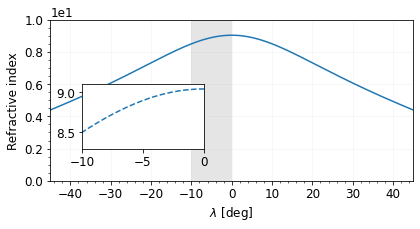

In [19]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),mu,color='tab:blue',label='$\mu$')

# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(0, 10)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Refractive index') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

scale=10
axins = ax.inset_axes([-37, 2, 30, 4],transform=ax.transData)

axins.plot(np.rad2deg(lats_rad),mu,color='tab:blue',label='$S$',linestyle='dashed')
axins.set_xlim(-10, 0)
axins.set_ylim(8.3,9.1)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax.axvspan(-10, 0, facecolor='gray', alpha=0.2)

# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('wave_refr_index.jpg',dpi=300)
plt.show()

### Plot wave fields

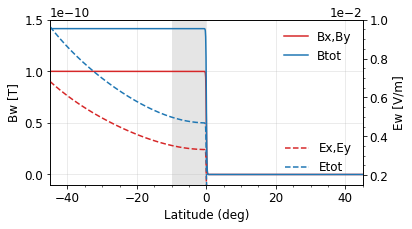

In [17]:
fig, ax1 = plt.subplots(figsize=(6,85*inch_to_mm))

ax1.set_xlabel('Latitude (deg)')
ax1.set_ylabel('Bw [T]')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.set_ylim(-0.1*10**(-10),1.5*10**(-10))
ax1.plot(np.rad2deg(lats_rad),Bx,label='Bx,By',color='tab:red')
ax1.plot(np.rad2deg(lats_rad),Bwmag,label='Btot',color='tab:blue')

ax1.legend(frameon=False)
ax1.tick_params(axis='y')

ax1.axvspan(-10, 0, facecolor='gray', alpha=0.2)
ax1.set_xlim(-45,45)
ax1.grid(alpha=.3)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Ew [V/m]')  # we already handled the x-label with ax1
ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.plot(np.rad2deg(lats_rad),Ex,label='Ex,Ey',color='tab:red',linestyle='dashed')
ax2.plot(np.rad2deg(lats_rad),Ewmag,label='Etot',color='tab:blue',linestyle='dashed')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.tick_params(axis='y')
ax2.set_ylim(1.5*10**(-3),10*10**(-3))
ax2.legend(frameon=False,loc=4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig('fields_%d_By_%d_nT.jpg' %(aeq0_deg,By_wave/10**(-12)),dpi=300)
plt.show()

### WaveProperties_mod results plot

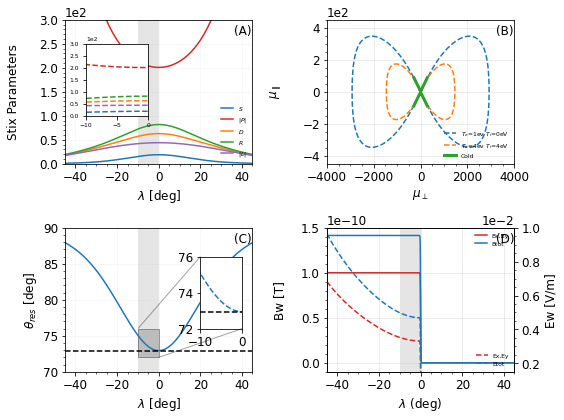

In [18]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
###################################################################
fig, ax = plt.subplots(2,2,figsize=(8,6))
# fig.suptitle('Environment_mod parameters')
plt.tight_layout()
############

ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,0].plot(np.rad2deg(lats_rad),S,color='tab:blue',label='$S$')
ax[0,0].plot(np.rad2deg(lats_rad),P,color='tab:red',label='$|P|$')
ax[0,0].plot(np.rad2deg(lats_rad),D,color='tab:orange',label='$D$')
ax[0,0].plot(np.rad2deg(lats_rad),R,color='tab:green',label='$R$')
ax[0,0].plot(np.rad2deg(lats_rad),L,color='tab:purple',label='$|L|$')

# ax.set_yscale('log')
ax[0,0].grid(alpha=.1)
ax[0,0].set_xlim(-45,45)
ax[0,0].set_ylim(0, 300)
ax[0,0].set_xlabel(r'$\lambda$ [deg]')
ax[0,0].set_ylabel('Stix Parameters',labelpad=19) 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
ax[0,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,0].xaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,0].legend(frameon=False,loc=4, prop={'size': 6})
scale=10

axins1 = ax[0,0].inset_axes([-35, 100, 30, 150],transform=ax[0,0].transData)
axins1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axins1.yaxis.get_offset_text().set_fontsize(6)
axins1.tick_params(axis='both', which='major', labelsize=6)
axins1.plot(np.rad2deg(lats_rad),S,color='tab:blue',label='$S$',linestyle='dashed')
axins1.plot(np.rad2deg(lats_rad),P,color='tab:red',label='$|P|$',linestyle='dashed')
axins1.plot(np.rad2deg(lats_rad),D,color='tab:orange',label='$D$',linestyle='dashed')
axins1.plot(np.rad2deg(lats_rad),R,color='tab:green',label='$R$',linestyle='dashed')
axins1.plot(np.rad2deg(lats_rad),L,color='tab:purple',label='$|L|$',linestyle='dashed')

axins1.set_xlim(-10, 0)
axins1.set_ylim(0,300)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax[0,0].axvspan(-10, 0, facecolor='gray', alpha=0.2)

##############################
ax[0,1].set_xlabel("$\mu_\perp$",fontsize=12)
ax[0,1].set_ylabel("$\mu_\parallel$",fontsize=12,labelpad=19) 
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].plot(muper_warm_e1_i0,mupar_warm_e1_i0,label=r'$T_e$=1ev $T_i$=0eV',linestyle='--')
# ax.plot(muper_warm_e0_i1,mupar_warm_e0_i1,label=r'$T_e$=0ev $T_i$=1eV',linestyle='--')
# ax.plot(muper_warm_e1_i1,mupar_warm_e1_i1,label=r'$T_e$=1ev $T_i$=1eV',linestyle='--')
ax[0,1].plot(muper_warm_e4_i4,mupar_warm_e4_i4,label=r'$T_e$=4ev $T_i$=4eV',linestyle='--')
ax[0,1].plot(muper_cold,mupar_cold,color="tab:green",label='Cold',linewidth=3)

ax[0,1].legend(frameon=False,loc=4, prop={'size': 6})
ax[0,1].yaxis.get_ticklocs(minor=True)
ax[0,1].minorticks_on()
ax[0,1].set_xlim(-4000,4000)
ax[0,1].set_ylim(-450,450)
ax[0,1].grid(alpha=.3)
#####################

ax[1,0].plot(np.rad2deg(lats_rad),theta_res0,color='tab:blue',label='$S$')


# ax.set_yscale('log')
ax[1,0].grid(alpha=.1)
ax[1,0].set_xlim(-45,45)
ax[1,0].set_ylim(70, 90)
ax[1,0].set_xlabel(r'$\lambda$ [deg]')
ax[1,0].set_ylabel(r'$\theta_{res}$ [deg]') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,0].xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.legend(frameon=False,loc=4)
scale=10
axins = ax[1,0].inset_axes([20, 76, 20,10],transform=ax[1,0].transData)

axins.plot(np.rad2deg(lats_rad),theta_res0,color='tab:blue',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(72,76)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax[1,0].axhline(np.min(theta_res0),color='black',linestyle='dashed')
axins.axhline(np.min(theta_res0),color='black',linestyle='dashed')
ax[1,0].axvspan(-10, 0, facecolor='gray', alpha=0.2)
mark_inset(ax[1,0], axins, loc1=4, loc2=2, fc="gray",alpha=.4, ec="0.1")

#############################################

ax[1,1].set_xlabel('$\lambda$ (deg)')
ax[1,1].set_ylabel('Bw [T]',labelpad=15)
ax[1,1].xaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,1].set_ylim(-0.1*10**(-10),1.5*10**(-10))
ax[1,1].plot(np.rad2deg(lats_rad),Bx,label='Bx,By',color='tab:red')
ax[1,1].plot(np.rad2deg(lats_rad),Bwmag,label='Btot',color='tab:blue')
ax[1,1].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,1].legend(frameon=False, prop={'size': 6})
ax[1,1].tick_params(axis='y')

ax[1,1].axvspan(-10, 0, facecolor='gray', alpha=0.2)
ax[1,1].set_xlim(-45,45)
ax[1,1].grid(alpha=.3)
ax2 = ax[1,1].twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Ew [V/m]')  # we already handled the x-label with ax1
ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.plot(np.rad2deg(lats_rad),Ex,label='Ex,Ey',color='tab:red',linestyle='dashed')
ax2.plot(np.rad2deg(lats_rad),Ewmag,label='Etot',color='tab:blue',linestyle='dashed')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.tick_params(axis='y')
ax2.set_ylim(1.5*10**(-3),10*10**(-3))
ax2.legend(frameon=False,loc=4, prop={'size': 6})
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# for ax in ax.flat:
#     ax.label_outer()
ax[0,0].text(0.9, 0.9, '(A)', transform=ax[0,0].transAxes)
ax[0,1].text(0.9, 0.9, '(B)', transform=ax[0,1].transAxes)
ax[1,0].text(0.9, 0.9, '(C)', transform=ax[1,0].transAxes)
ax[1,1].text(0.9, 0.9, '(D)', transform=ax[1,1].transAxes)
             
plt.savefig('wave_multi.jpg',dpi=300)
plt.show()

### Calcualte pitch angle limits

In [20]:
L_shell=5
lamdas=np.arange(-90,90,0.08)
lamdas_rad=np.deg2rad(lamdas)
aeqs=np.arange(0,180,0.08)
aeqs_rad=np.deg2rad(aeqs)
Beq0=env.Bmag_dipole(5,0)
alphas=np.zeros((len(lamdas_rad),len(aeqs)))

envelope=[]
envelope2=[]
for k in range(0,len(aeqs_rad)):
        
    for i in range(0,len(lamdas_rad)):
    
        Blam0=env.Bmag_dipole(5,lamdas_rad[i])
        salpha0=np.sin(aeqs_rad[k])*np.sqrt(Blam0/Beq0)
        alpha0=np.arcsin(salpha0)
        alphas[i,k]=alpha0

        if np.isnan(alpha0) != True:
        
            print(np.rad2deg(alpha0),np.rad2deg(aeqs_rad[k]),np.rad2deg(lamdas_rad[i]))
            envelope.append(np.rad2deg(lamdas_rad[i]))
            break
            
# envelope2=-envelope
#         print(np.rad2deg(aeqs_rad[k]),np.rad2deg(lamdas_rad[i]),np.rad2deg(alpha0))

for i in range(0,len(envelope)):
        envelope2.append(-envelope[i])
        
#             print(np.rad2deg(aeqs_rad[k]))
#             continue

0.0 0.0 -90.0
89.77810688071897 0.08 -82.80000000000015
80.766775091774 0.16 -80.8800000000002
78.01674109973926 0.24 -79.52000000000022
79.77219087650879 0.32 -78.48000000000025
81.25102449851309 0.4 -77.60000000000026
80.10356403336141 0.48 -76.80000000000028
87.15775727775095 0.56 -76.1600000000003
86.7707902366143 0.64 -75.52000000000031
81.23353797447938 0.72 -74.88000000000034
80.48587069156198 0.8 -74.32000000000033
82.97066757754634 0.88 -73.84000000000034
83.30336768442963 0.96 -73.36000000000035
81.68236484980191 1.04 -72.88000000000036
84.6072095267233 1.12 -72.48000000000037
86.54594941652323 1.2 -72.0800000000004
86.26235843968281 1.28 -71.68000000000039
84.33652808684117 1.36 -71.2800000000004
82.0231034891508 1.44 -70.88000000000041
84.70359158452938 1.52 -70.56000000000041
87.74318117481901 1.6 -70.24000000000042
81.6763199788914 1.6800000000000002 -69.84000000000043
81.8779971929423 1.76 -69.52000000000044
81.56002323595985 1.84 -69.20000000000044
86.56531879251597 1.9

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arcsin


84.70350084150608 12.56 -49.12000000000087
85.38556870767763 12.64 -49.04000000000087
86.16451903231298 12.72 -48.960000000000875
87.11832147994357 12.8 -48.88000000000088
88.56130528582197 12.88 -48.80000000000088
84.54316665125165 12.96 -48.64000000000088
85.1196638118665 13.040000000000001 -48.56000000000088
85.75465115109067 13.120000000000001 -48.480000000000885
86.47998355043684 13.200000000000001 -48.40000000000089
87.36981457007087 13.280000000000001 -48.32000000000089
88.73401802983369 13.36 -48.24000000000089
84.55590597432408 13.440000000000001 -48.080000000000894
85.04350217816435 13.52 -48.000000000000895
85.56763268237766 13.6 -47.9200000000009
86.14344894845722 13.68 -47.8400000000009
86.79905941495814 13.76 -47.7600000000009
87.59940648060372 13.84 -47.6800000000009
88.80778780149178 13.920000000000002 -47.600000000000904
84.54365570733063 14.0 -47.44000000000091
84.93621835969542 14.08 -47.36000000000091
85.34732460563305 14.16 -47.28000000000091
85.78262684733447 14.2

86.88143754459446 29.04 -33.8400000000012
86.13447902841875 29.12 -33.7600000000012
85.51027727938387 29.200000000000003 -33.6800000000012
88.05028507392224 29.280000000000005 -33.6800000000012
86.98715433022133 29.36 -33.6000000000012
86.21173825478036 29.44 -33.520000000001204
85.57029693270924 29.520000000000003 -33.440000000001206
88.13518109698559 29.600000000000005 -33.440000000001206
87.03226664641947 29.68 -33.36000000000121
86.24043739475817 29.76 -33.28000000000121
85.58887957818112 29.84 -33.20000000000121
88.12350225193559 29.92 -33.20000000000121
87.01644858162541 29.999999999999996 -33.12000000000121
86.22136750886361 30.080000000000005 -33.040000000001214
85.56710826164229 30.16 -32.96000000000122
88.02052176375179 30.240000000000002 -32.96000000000122
86.94293756529667 30.320000000000004 -32.88000000000122
86.15704841962422 30.400000000000006 -32.800000000001226
85.50710432411312 30.48 -32.72000000000122
87.84242987600392 30.560000000000002 -32.72000000000122
86.8178630

88.4676263605917 44.08 -23.680000000001414
87.11255902791824 44.16000000000001 -23.600000000001415
86.2182341523661 44.24 -23.520000000001417
87.78409106317075 44.32000000000001 -23.520000000001417
86.70124000771494 44.4 -23.44000000000142
88.75926960898492 44.480000000000004 -23.44000000000142
87.25814340769318 44.56 -23.36000000000142
86.32970281785494 44.64 -23.280000000001422
87.94839065115038 44.72 -23.280000000001422
86.81115646222233 44.800000000000004 -23.200000000001427
89.0226261752179 44.88 -23.200000000001427
87.36924342741655 44.96 -23.12000000000143
86.41376327439144 45.04 -23.040000000001427
88.0694478739061 45.12 -23.040000000001427
86.88989203089506 45.20000000000001 -22.96000000000143
89.23406240058088 45.28 -22.96000000000143
87.44312426496656 45.36 -22.88000000000143
86.46972771575174 45.44 -22.800000000001432
88.14120748854097 45.52 -22.800000000001432
86.93649393873338 45.6 -22.720000000001434
89.34826861987531 45.68 -22.720000000001434
87.47826297258098 45.76 -22

86.78869781184292 59.040000000000006 -15.120000000001598
87.80322880850605 59.12 -15.120000000001598
86.89671397456438 59.20000000000001 -15.0400000000016
87.95597038697179 59.28 -15.0400000000016
87.00539667844933 59.36 -14.960000000001601
88.11597423287024 59.440000000000005 -14.960000000001601
87.11486844114788 59.52 -14.880000000001603
88.28535129756932 59.60000000000001 -14.880000000001603
87.22527141331561 59.68 -14.800000000001605
88.46729375575018 59.76 -14.800000000001605
87.33677188011762 59.84 -14.720000000001603
88.66703724644098 59.92 -14.720000000001603
87.44956615624166 59.99999999999999 -14.640000000001605
88.894306769606 60.080000000000005 -14.640000000001605
87.56388843594884 60.16000000000001 -14.560000000001606
89.17161174360672 60.24000000000001 -14.560000000001606
87.68002144697438 60.32 -14.480000000001608
89.59068917744199 60.4 -14.480000000001608
87.79831122814949 60.480000000000004 -14.40000000000161
86.91914367077959 60.56 -14.320000000001613
87.9191881507458

87.99886763075527 73.44 -7.840000000001751
88.8658508665212 73.52 -7.840000000001751
87.97517467230227 73.60000000000001 -7.760000000001753
88.81276266035223 73.68 -7.760000000001753
87.9515522083316 73.76 -7.680000000001755
88.76163064116582 73.84 -7.680000000001755
87.92803195899498 73.92 -7.6000000000017565
88.712276495589 74.0 -7.6000000000017565
87.90464390952802 74.08 -7.520000000001759
88.6645553624324 74.16 -7.520000000001759
87.88141642286072 74.24 -7.440000000001761
88.61834805203725 74.32000000000001 -7.440000000001761
87.85837634731239 74.4 -7.3600000000017625
88.57355542642307 74.48 -7.3600000000017625
87.8355491191647 74.56 -7.280000000001764
88.53009425299567 74.64 -7.280000000001764
87.81295886004779 74.72 -7.200000000001766
88.48789408829853 74.8 -7.200000000001766
87.79062846913685 74.88 -7.120000000001767
88.4468948974731 74.96000000000001 -7.120000000001767
87.76857971025332 75.04 -7.040000000001768
88.4070452093564 75.12 -7.040000000001768
89.6700436281461 75.2 -7.

89.29987398882932 88.32000000000002 -0.7200000000019031
89.52280583575333 88.4 -0.7200000000019031
89.31620550900665 88.48 -0.6400000000019048
89.51965576564525 88.56 -0.6400000000019048
89.91821578854972 88.64000000000001 -0.6400000000019048
89.52313412463769 88.72 -0.5600000000019065
89.82978650963089 88.8 -0.5600000000019065
89.53340181652402 88.88 -0.4800000000019082
89.78811401091731 88.96000000000001 -0.4800000000019082
89.55093585853545 89.04 -0.40000000000190994
89.76665938784568 89.12 -0.40000000000190994
89.57664866641082 89.2 -0.32000000000191164
89.7599569581172 89.28 -0.32000000000191164
89.61217317876631 89.36 -0.24000000000191332
89.76674666858752 89.44 -0.24000000000191332
89.66058510569572 89.52 -0.16000000000191505
89.78833600452775 89.60000000000001 -0.16000000000191505
89.72870627465095 89.68 -0.08000000000191676
89.83029391759868 89.76 -0.08000000000191676
89.84000000000059 89.84 -1.9184653865522705e-12
89.9200000000015 89.92 -1.9184653865522705e-12
90.0 90.0 -1.91

88.73892286679758 103.2 -6.2400000000017855
88.06437058804218 103.28 -6.2400000000017855
88.79673903161826 103.36 -6.320000000001784
88.09441900213706 103.44 -6.320000000001784
88.85816812623133 103.52 -6.400000000001782
88.12535994097216 103.60000000000001 -6.400000000001782
88.9237741493573 103.68 -6.48000000000178
88.15720639427492 103.76 -6.48000000000178
88.99431524668131 103.84 -6.560000000001779
88.18997323388075 103.92 -6.560000000001779
89.07085021480475 104.0 -6.640000000001777
88.2236774593283 104.08 -6.640000000001777
89.15493431089884 104.16 -6.720000000001775
88.25833848915714 104.24000000000002 -6.720000000001775
89.24901750318281 104.32000000000001 -6.800000000001774
88.2939785081557 104.4 -6.800000000001774
89.35738070213695 104.48 -6.880000000001772
88.33062288372192 104.56000000000002 -6.880000000001772
89.48890695675593 104.64 -6.96000000000177
88.36830066822121 104.72 -6.96000000000177
89.6700436281461 104.8 -7.040000000001768
88.4070452093564 104.88000000000001 -7

88.74664175704946 118.40000000000002 -13.840000000001623
87.44385195724192 118.48 -13.840000000001623
88.58908838499036 118.56 -13.920000000001622
87.35678567542271 118.64 -13.920000000001622
88.44239952691778 118.72 -14.00000000000162
87.26960732478423 118.79999999999998 -14.00000000000162
88.3036802903893 118.88000000000001 -14.08000000000162
87.18228269515872 118.96000000000001 -14.08000000000162
88.1710473253606 119.04 -14.160000000001618
87.09478143196223 119.11999999999999 -14.160000000001618
88.04319772001294 119.20000000000002 -14.240000000001615
87.00707648839662 119.28000000000002 -14.240000000001615
87.91918815074584 119.36 -14.320000000001613
86.9191436707797 119.44 -14.320000000001613
87.79831122814949 119.52 -14.40000000000161
89.59068917744109 119.60000000000002 -14.480000000001608
87.68002144697438 119.68 -14.480000000001608
89.17161174360672 119.76 -14.560000000001606
87.56388843594884 119.84 -14.560000000001606
88.894306769606 119.92 -14.640000000001605
87.44956615624

88.17786677695715 131.92000000000002 -21.280000000001465
86.60049126778978 132.0 -21.280000000001465
87.60018074705182 132.08 -21.360000000001463
86.25301074978177 132.16 -21.360000000001463
87.12896962249975 132.24 -21.44000000000146
88.44498431522665 132.32 -21.52000000000146
86.71797832967037 132.4 -21.52000000000146
87.7756464134194 132.48 -21.600000000001458
86.34676361105838 132.56 -21.600000000001458
87.25713275717501 132.64000000000001 -21.680000000001456
88.70648706571812 132.72 -21.760000000001455
86.81483970924079 132.8 -21.760000000001455
87.92717076271768 132.88 -21.840000000001453
86.42033726780673 132.96 -21.840000000001453
87.36046152836666 133.04 -21.92000000000145
88.95438226582372 133.12 -22.00000000000145
86.88788357374231 133.2 -22.00000000000145
88.04714285274389 133.28 -22.080000000001448
86.47134492655917 133.36 -22.080000000001448
87.43439927910312 133.44 -22.160000000001446
89.17145123300364 133.52 -22.240000000001444
86.93409718053665 133.6 -22.24000000000144

86.45684289609852 147.28 -31.12000000000126
87.38389278168727 147.36 -31.200000000001253
88.93967615250399 147.44 -31.280000000001255
86.06415200409455 147.52 -31.280000000001255
86.86723656119956 147.6 -31.36000000000125
87.9681959998031 147.68 -31.440000000001252
85.68445227483915 147.76 -31.440000000001252
86.3969295160043 147.84 -31.520000000001247
87.29232469412375 147.92000000000002 -31.60000000000125
88.70684673278784 148.0 -31.680000000001243
85.95618934401645 148.08 -31.680000000001243
86.72298725523288 148.16 -31.76000000000124
87.73789949624206 148.24 -31.84000000000124
85.53571728674939 148.32 -31.84000000000124
86.21120941791914 148.4 -31.920000000001238
87.03816505106681 148.48 -32.000000000001236
88.2160286439971 148.56 -32.080000000001235
85.73564162280199 148.64000000000001 -32.080000000001235
86.4442627963893 148.72 -32.16000000000123
87.33637559911926 148.8 -32.24000000000123
88.75912167136067 148.88 -32.32000000000123
85.9092152204882 148.96 -32.32000000000123
86.64

88.65654389839699 164.4 -45.76000000000094
88.06556139572217 164.48 -45.84000000000094
87.59518821395844 164.56 -45.92000000000094
87.18404577111845 164.64000000000001 -46.00000000000094
86.80891345515828 164.72 -46.080000000000936
86.45810885713503 164.8 -46.160000000000935
86.1248138574666 164.88 -46.24000000000093
85.80466069126706 164.96 -46.32000000000093
85.49466496162577 165.04 -46.40000000000093
85.19268830908257 165.12 -46.48000000000093
84.89714152266725 165.20000000000002 -46.560000000000926
84.60680865909585 165.28 -46.640000000000924
89.35672812734882 165.36 -46.80000000000093
88.09297797683499 165.44 -46.88000000000092
87.35734887163116 165.52 -46.960000000000925
86.76638905664298 165.6 -47.040000000000916
86.25080143067791 165.68 -47.120000000000914
85.78262684733508 165.76 -47.20000000000091
85.34732460563266 165.84 -47.28000000000091
84.93621835969527 165.92000000000002 -47.36000000000091
84.54365570733063 166.0 -47.44000000000091
88.80778780148752 166.08 -47.600000000

### Plot pitch angle range

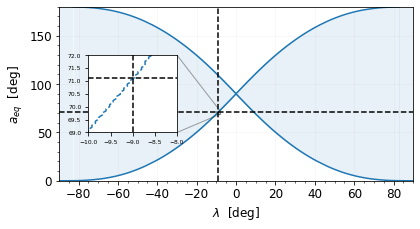

In [21]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
inch_to_mm=0.0393700787
import matplotlib.ticker as tck
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(envelope,np.rad2deg(aeqs_rad),color="tab:blue")
ax.plot(envelope2,np.rad2deg(aeqs_rad),color="tab:blue")
ax.axvline(-9,color='black',linestyle='dashed')
ax.axhline(71,color='black',linestyle='dashed')
# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-90,90)
ax.set_ylim(0,180)
ax.set_xlabel("$\lambda$  [deg]")
ax.set_ylabel("$a_{eq}$  [deg]")
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.fill_between(envelope, np.rad2deg(aeqs_rad),color='tab:blue',alpha=0.1, linewidth=0.0)
ax.fill_between(envelope2, np.rad2deg(aeqs_rad),color='tab:blue',alpha=0.1, linewidth=0.0)
ax.axvspan(-90,-82.6,color='tab:blue',alpha=0.1, linewidth=0.0)
ax.axvspan(82.6,90,color='tab:blue',alpha=0.1, linewidth=0.0)
scale=10
# # axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([-75, 50, 45, 80],transform=ax.transData)
axins.plot(envelope,np.rad2deg(aeqs_rad),color="tab:blue",linestyle='dashed')
# axins.plot(envelope2,np.rad2deg(aeqs_rad),color="tab:blue")
axins.axvline(-9,color='black',linestyle='dashed')
axins.axhline(71.1,color='black',linestyle='dashed')

axins.set_xlim(-10, -8)
axins.set_ylim(69, 72)
axins.tick_params(axis='both', which='major', labelsize=6)
# plt.xticks(visible=False)
mark_inset(ax, axins, loc1=4, loc2=1, fc="gray",alpha=.4, ec="0.1")
# plt.yticks(visible=False)
# plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_magnetic.jpg',dpi=300)
plt.show()

### Calculate densities from different models

In [22]:
#define L shell
Lshell=5
# Kp value in the preceding 24 hours
Kpmax1=1
Kpmax2=5
# day number (here January the first)
day=0
#magnetic local time (02.00)
mlt=2
#13 month average sunspot number
Rsun1=90
Rsun2=40

#initialize an empty array
ne_final_min=[]
ne_final_max=[]

#define latitudinal range
lamdas=np.arange(-45,45,0.08)
lamdas_rad=np.deg2rad(lamdas)

#calculate equatorial electron density [Carpenter and Anderson model]
ne_min=env.density_equ_carpenter_anderson(Lshell,Kpmax1,day,mlt,Rsun1)
ne_max=env.density_equ_carpenter_anderson(Lshell,Kpmax2,day,mlt,Rsun2)

#calculate equatorial electron density [Sheeley model]
ne_s_mean,ne_s_min,ne_s_max=env.density_equ_sheeley(Lshell)

#allocations
ne_CAmin_denton=[]
neq_oz=[]
nelam_oz=[]
ne_CAmax_denton=[]
ne_s_denton=[]
ne_bortink=[]

#calculate electron denity along the field line
for i in range(0,len(lamdas)):
    ne_CAmin_denton_tmp=env.density_FL_denton(ne_min,lamdas_rad[i])
    ne_bort_tmp=env.density_FL_denton(10,lamdas_rad[i])
    neq_oz_tmp,nelam_oz_tmp=env.density_ozhogin(Lshell,lamdas_rad[i])
    ne_CAmax_denton_tmp=env.density_FL_denton(ne_max,lamdas_rad[i])
    ne_s_denton_tmp=env.density_FL_denton(ne_s_mean,lamdas_rad[i])
    
    ne_CAmin_denton.append(ne_CAmin_denton_tmp)
    neq_oz.append(neq_oz_tmp)
    nelam_oz.append(nelam_oz_tmp)
    ne_CAmax_denton.append(ne_CAmax_denton_tmp)
    ne_s_denton.append(ne_s_denton_tmp)
    ne_bortink.append(ne_bort_tmp)
    
print(ne_min)
print(ne_max)
print(ne_s_mean)
print(ne_s_min)
print(neq_oz[0])

216.30223886572563
4.8637109784408725
119.71285880287195
49.76133525826508
104.18375349865367


### Plot electron densities of different models

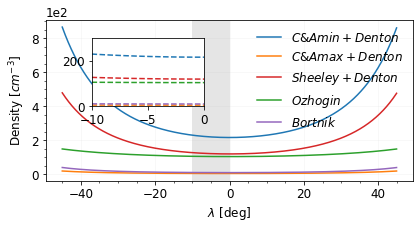

In [23]:
import matplotlib.ticker as tck
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

inch_to_mm=0.0393700787
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lamdas_rad),ne_CAmin_denton,color='tab:blue',label='$C&A min + Denton$')
ax.plot(np.rad2deg(lamdas_rad),ne_CAmax_denton,color='tab:orange',label='$C&A max + Denton$')
ax.plot(np.rad2deg(lamdas_rad),ne_s_denton,color='tab:red',label='$Sheeley + Denton$')
ax.plot(np.rad2deg(lamdas_rad),nelam_oz,color='tab:green',label='$Ozhogin$')
ax.plot(np.rad2deg(lamdas_rad),ne_bortink,color='tab:purple',label='$Bortnik$')

# ax.set_yscale('log')
ax.grid(alpha=.1)
# ax.set_xlim(-45,45)
# ax.set_ylim(0, 10)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Density $[cm^{-3}]$') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
ax.legend(frameon=False,loc=1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

axins = ax.inset_axes([-37, 400, 30, 400],transform=ax.transData)

axins.plot(np.rad2deg(lamdas_rad),ne_CAmin_denton,color='tab:blue',label='$C&A min + Denton$',linestyle='dashed')
axins.plot(np.rad2deg(lamdas_rad),ne_CAmax_denton,color='tab:orange',label='$C&A max + Denton$',linestyle='dashed')
axins.plot(np.rad2deg(lamdas_rad),ne_s_denton,color='tab:red',label='$Sheeley + Denton$',linestyle='dashed')
axins.plot(np.rad2deg(lamdas_rad),nelam_oz,color='tab:green',label='$Ozhogin$',linestyle='dashed')
axins.plot(np.rad2deg(lamdas_rad),ne_bortink,color='tab:purple',label='$Bortnik$',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(0,300)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax.axvspan(-10, 0, facecolor='gray', alpha=0.2)

# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('densities_wpi.jpg',dpi=300)
plt.show()